## World Health Organization Standards

In [155]:
# According to WHO standards, a minimum of 3 beds per 1000 people is required. 
# Monica wants to analyse whether different regions in India as well as the nation as a whole are up to that standard. 
# If not, how many facilities are required to fill the gap?

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Problem Statement 16: (Gap in number of beds)


In [157]:
# Visually represent the difference between the expected number of hospital beds and the available number of hospital beds in 
# each State/UT, as well as at the national level (if any).

In [158]:
df_hsptl = pd.read_csv('../Clean_data/all_hospitals.csv')
df_hsptl.head()

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,ANDAMAN AND NICOBAR ISLANDS,27,4,NaN,3,34,1246
1,ANDHRA PRADESH,1417,198,31,20,1666,60799
2,ARUNACHAL PRADESH,122,62,NaN,15,199,2320
3,ASSAM,1007,166,14,33,1220,19115
4,BIHAR,2007,63,33,43,2146,17796


In [159]:
df_hsptl.shape

(37, 7)

In [160]:
# reading cesus dataframe
df_cens = pd.read_csv('../Clean_data/Census_cleaned.csv')
df_cens.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,0,282823.0,156831.0,158438.0,NaN,0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,0,207741.0,127908.0,160649.0,27190.0,0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,0,62834.0,30936.0,36920.0,17474.0,0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,0,56301.0,29935.0,40370.0,7774.0,0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,476835.0,251899.0,224936.0,0,163333.0,98391.0,132139.0,15269.0,0,304979.0,109818.0,61334.0,704.0


In [161]:
# creating temp df with state wise population
df_pop = df_cens.groupby('State/UT').sum()['Population']/1000 #.sort_index()
df_pop = df_pop.reset_index()
df_pop.head()

,State/UT,Population
0,ANDAMAN AND NICOBAR ISLANDS,380.581
1,ANDHRA PRADESH,49386.799
2,ARUNACHAL PRADESH,1383.727
3,ASSAM,31205.576
4,BIHAR,104099.452


In [162]:
# adding a new row with india pop 
df_pop.loc[36] =['ALL INDIA',df_pop['Population'].sum()]
df_pop.tail()

,State/UT,Population
32,TRIPURA,3673.917
33,UTTAR PRADESH,199812.341
34,UTTARAKHAND,10086.292
35,WEST BENGAL,91276.115
36,ALL INDIA,1209917.771


In [163]:
# taking requered cols from hosptl df
df_hsptl = df_hsptl[['State/UT','Hospitals','HospitalBeds']]
df_hsptl.head()

,State/UT,Hospitals,HospitalBeds
0,ANDAMAN AND NICOBAR ISLANDS,34,1246
1,ANDHRA PRADESH,1666,60799
2,ARUNACHAL PRADESH,199,2320
3,ASSAM,1220,19115
4,BIHAR,2146,17796


In [164]:
# merging the temp population dataframe and hospital dataframe
df_merged =  df_hsptl.merge(df_pop,how='inner',on='State/UT')
df_merged.head()

,State/UT,Hospitals,HospitalBeds,Population
0,ANDAMAN AND NICOBAR ISLANDS,34,1246,380.581
1,ANDHRA PRADESH,1666,60799,49386.799
2,ARUNACHAL PRADESH,199,2320,1383.727
3,ASSAM,1220,19115,31205.576
4,BIHAR,2146,17796,104099.452


In [165]:
df_merged['Required_Beds'] = df_merged['Population'].apply(lambda x: round(x*3))
df_merged.head()

,State/UT,Hospitals,HospitalBeds,Population,Required_Beds
0,ANDAMAN AND NICOBAR ISLANDS,34,1246,380.581,1142
1,ANDHRA PRADESH,1666,60799,49386.799,148160
2,ARUNACHAL PRADESH,199,2320,1383.727,4151
3,ASSAM,1220,19115,31205.576,93617
4,BIHAR,2146,17796,104099.452,312298


In [166]:
# converting data type of hospital beds to int
df_merged['HospitalBeds'] = df_merged['HospitalBeds'].apply(lambda x: int(x.replace(',','')))

<AxesSubplot:xlabel='State/UT'>

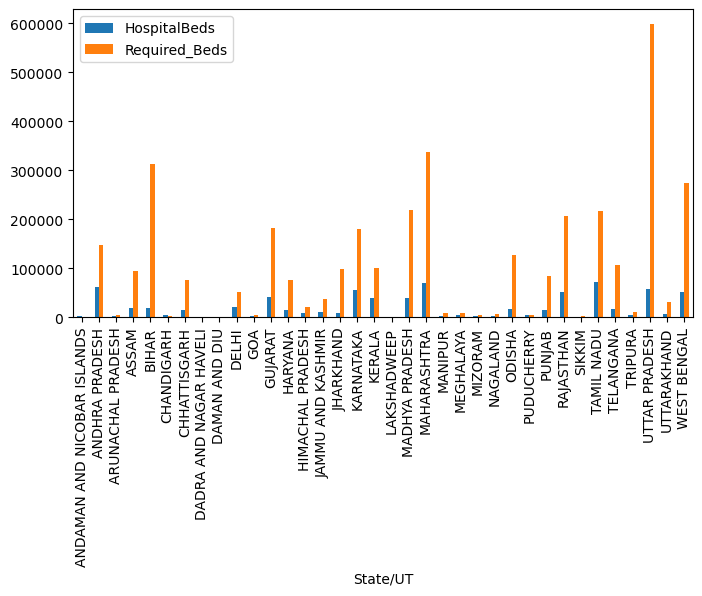

In [167]:
df_merged[['State/UT',"HospitalBeds","Required_Beds"]].iloc[:36].plot(kind='bar',x='State/UT',figsize=(8,4))

In [168]:
df_merged.describe()

,HospitalBeds,Population,Required_Beds
count,37.000000,3.700000e+01,3.700000e+01
mean,39947.243243,6.540096e+04,1.962029e+05
std,120196.898697,1.979847e+05,5.939542e+05
min,250.000000,6.447300e+01,1.930000e+02
25%,2666.000000,1.458545e+03,4.376000e+03
50%,13527.000000,2.535146e+04,7.605400e+04
75%,39511.000000,6.015809e+04,1.804740e+05
max,739024.000000,1.209918e+06,3.629753e+06


In [170]:
df_x = df_merged[(df_merged['HospitalBeds'] < 8000) & (df_merged['Required_Beds'] < 10000)]
df_y = df_merged[~df_merged['State/UT'].isin(df_x['State/UT'])]


<AxesSubplot:xlabel='State/UT'>

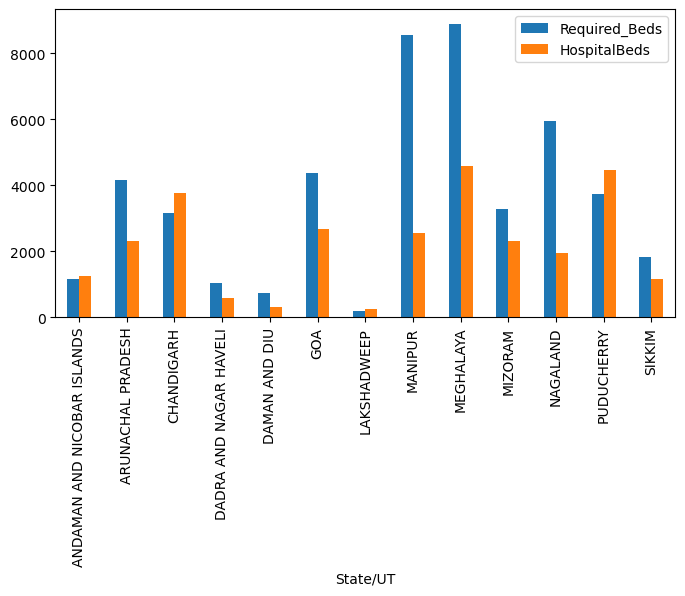

In [ ]:
df_x[['Required_Beds','HospitalBeds','State/UT']].plot(kind='bar',x='State/UT',figsize=(8,4))

<AxesSubplot:xlabel='State/UT'>

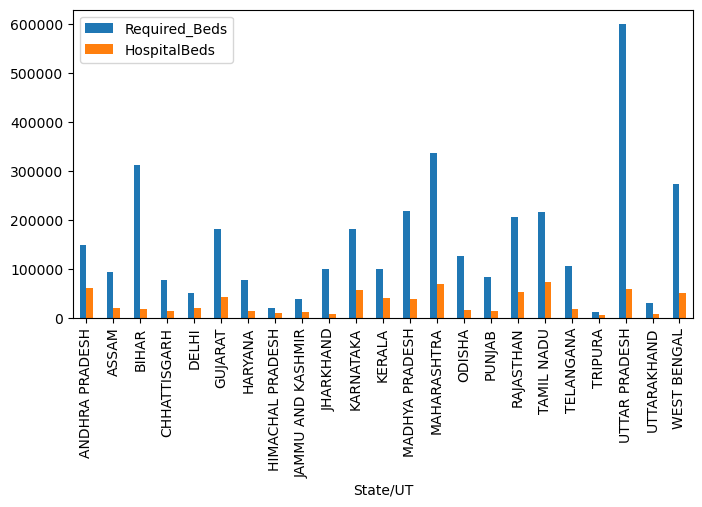

In [171]:
df_y[['Required_Beds','HospitalBeds','State/UT']].iloc[:23].plot(kind='bar',x='State/UT',figsize=(8,4))

<AxesSubplot:xlabel='State/UT'>

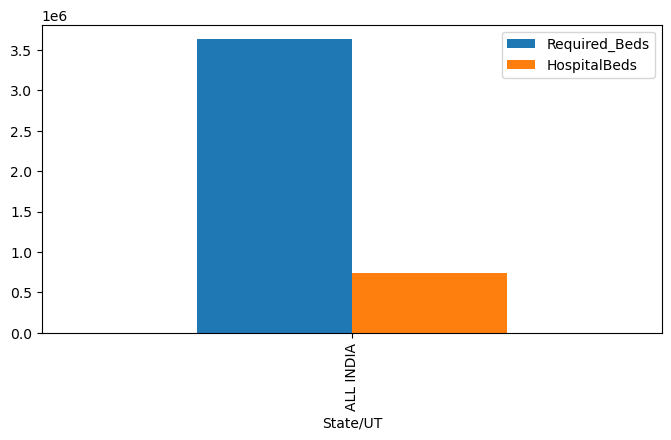

In [ ]:
df_y[['Required_Beds','HospitalBeds','State/UT']].iloc[23:].plot(kind='bar',x='State/UT',figsize=(8,4))

### Problem Statement 17: (Hospitals required to meet the standards)


In [ ]:
# In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all 
# by itself how many government hospitals may be required in each state or union territory as well as at the national level?

# Find the average number of beds in a government hospital. Divide it by the gap in the number of beds to reach the standards 
# in the region, and round the number to the nearest integer to find the value.

# Represent the findings visually.